In [6]:
from sklearn.feature_extraction.text import CountVectorizer

v=CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [7]:
 corpus=[
     
     "Thor ate pizza",
     "Loki is tall",
     "Loki is eating pizza"
 ]

In [8]:
import spacy

In [12]:
nlp=spacy.load("en_core_web_sm")

def preprocess(text):
    doc=nlp(text)
    
    filltered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filltered_tokens.append(token.lemma_)
        
        
    return " ".join(filltered_tokens)



In [15]:
preprocess("Loki is eating pizza")

'Loki eat pizza'

In [16]:
corpus_preprocess=[preprocess(text) for text in corpus]
corpus_preprocess

['Thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [18]:
v=CountVectorizer(ngram_range=(1,2))
v.fit(corpus_preprocess)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [20]:
v.transform(["thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [21]:
import pandas as pd
data=pd.read_csv("NewsCategorizer.csv")

In [22]:
data.head()

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [25]:
data=data.drop(['links','short_description','keywords'],axis=True)

In [27]:
data.shape

(50000, 2)

In [28]:
data.groupby('category').size()

category
BUSINESS          5000
ENTERTAINMENT     5000
FOOD & DRINK      5000
PARENTING         5000
POLITICS          5000
SPORTS            5000
STYLE & BEAUTY    5000
TRAVEL            5000
WELLNESS          5000
WORLD NEWS        5000
dtype: int64

In [33]:
min_sample=1000

df_BUSINESS=data[data.category=="BUSINESS"].sample(min_sample,random_state=2022)
df_ENTERTAINMENT=data[data.category=="ENTERTAINMENT"].sample(min_sample,random_state=2022)
df_FOOD_DRINK=data[data.category=="FOOD & DRINK"].sample(min_sample,random_state=2022)
df_PARENTING=data[data.category=="PARENTING"].sample(min_sample,random_state=2022)
df_POLITICS=data[data.category=="POLITICS"].sample(min_sample,random_state=2022)
df_SPORTS=data[data.category=="SPORTS"].sample(min_sample,random_state=2022)
df_STYLE_BEAUTY =data[data.category=="STYLE & BEAUTY"].sample(min_sample,random_state=2022)
df_TRAVEL=data[data.category=="TRAVEL"].sample(min_sample,random_state=2022)
df_WELLNESS=data[data.category=="WELLNESS"].sample(min_sample,random_state=2022)
df_WORLD_NEWS=data[data.category=="WORLD NEWS"].sample(min_sample,random_state=2022)


In [34]:
df_balanced=pd.concat([df_BUSINESS,df_ENTERTAINMENT,df_FOOD_DRINK,df_PARENTING,df_POLITICS,df_SPORTS,df_STYLE_BEAUTY,df_TRAVEL,df_WELLNESS,df_WORLD_NEWS],axis=0)
df_balanced.category.value_counts()

BUSINESS          1000
ENTERTAINMENT     1000
FOOD & DRINK      1000
PARENTING         1000
POLITICS          1000
SPORTS            1000
STYLE & BEAUTY    1000
TRAVEL            1000
WELLNESS          1000
WORLD NEWS        1000
Name: category, dtype: int64

In [35]:
df_balanced['category_num']=df_balanced.category.map({

'BUSINESS':0,       
'ENTERTAINMENT':1,     
'FOOD & DRINK':2,      
'PARENTING':3,         
'POLITICS':4,          
'SPORTS':5,            
'STYLE & BEAUTY':6,    
'TRAVEL':7,            
'WELLNESS':8,          
'WORLD NEWS':9        
})

In [36]:
df_balanced.head()

,category,headline,category_num
43419,BUSINESS,MasterCard Wants You To Pay For Stuff With Sel...,0
40178,BUSINESS,Tesla's Nightmare Month Just Keeps Getting Worse,0
43721,BUSINESS,What's the Future of Retail Banking?,0
43087,BUSINESS,Investing Facts You Probably Don't Know,0
43685,BUSINESS,"Women in Business: Doris Greif, Regional Vice ...",0


In [39]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(


    df_balanced.headline,
    df_balanced.category_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.category_num
)

In [40]:
print(x_train.shape)
x_train.head()

(8000,)


38248    MH370 Report Finds Plane Was In Rapid Descent ...
22261    Behind Madonna's Super Bowl Half Time Performa...
15790                Summer Travel Tipping Recommendations
41799    Minimum Wage For Restaurant Servers Remains St...
13692    Jennifer Lawrence Is Working On A TV Series In...
Name: headline, dtype: object

In [42]:
y_train.value_counts()

9    800
6    800
7    800
0    800
1    800
5    800
8    800
4    800
2    800
3    800
Name: category_num, dtype: int64

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


clf = Pipeline([
    
    ('vectorizer_bow',CountVectorizer()),
    ('Multi NB',MultinomialNB())
])


clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       200
           1       0.62      0.65      0.63       200
           2       0.83      0.77      0.80       200
           3       0.60      0.71      0.65       200
           4       0.70      0.70      0.70       200
           5       0.81      0.78      0.79       200
           6       0.76      0.84      0.80       200
           7       0.67      0.62      0.64       200
           8       0.65      0.60      0.62       200
           9       0.73      0.73      0.73       200

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000



In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


clf = Pipeline([
    
    ('vectorizer_bow',CountVectorizer(ngram_range = (1,2))),
    ('Multi NB',MultinomialNB())
])


clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       200
           1       0.61      0.69      0.65       200
           2       0.81      0.74      0.78       200
           3       0.60      0.67      0.63       200
           4       0.70      0.70      0.70       200
           5       0.82      0.83      0.83       200
           6       0.75      0.83      0.79       200
           7       0.64      0.61      0.63       200
           8       0.65      0.56      0.60       200
           9       0.72      0.73      0.72       200

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000



In [46]:
x_test[:5]

21291    Brunettes Are Having The Best Week Ever On Our...
31230                      Cocktails for Spring's Kick-Off
27657    The Moment I Realized Our Struggles Weren't Go...
34712    Easy Cooking Tip: Mise En Place Will Keep You ...
41200    Thanks, Obama, For Confirming That It's Totall...
Name: headline, dtype: object

In [47]:
y_test[:5]

21291    6
31230    2
27657    3
34712    2
41200    0
Name: category_num, dtype: int64

In [48]:
y_pred[:5]

array([6, 2, 3, 2, 4], dtype=int64)

In [49]:
df_balanced['preprocessed_txt']=df_balanced.headline.apply(preprocess)

In [50]:
df_balanced.head()

,category,headline,category_num,preprocessed_txt
43419,BUSINESS,MasterCard Wants You To Pay For Stuff With Sel...,0,MasterCard want pay stuff selfie
40178,BUSINESS,Tesla's Nightmare Month Just Keeps Getting Worse,0,Tesla Nightmare Month keep get bad
43721,BUSINESS,What's the Future of Retail Banking?,0,Future Retail Banking
43087,BUSINESS,Investing Facts You Probably Don't Know,0,invest fact probably know
43685,BUSINESS,"Women in Business: Doris Greif, Regional Vice ...",0,woman Business Doris Greif Regional Vice Presi...


In [51]:
x_train,x_test,y_train,y_test=train_test_split(


    df_balanced.preprocessed_txt,
    df_balanced.category_num,
    test_size=0.2,
    random_state=2022,
    stratify=df_balanced.category_num
)


clf = Pipeline([
    
    ('vectorizer_bow',CountVectorizer(ngram_range = (1,2))),
    ('Multi NB',MultinomialNB())
])


clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65       200
           1       0.71      0.66      0.68       200
           2       0.79      0.78      0.78       200
           3       0.69      0.72      0.70       200
           4       0.69      0.69      0.69       200
           5       0.76      0.85      0.80       200
           6       0.70      0.88      0.78       200
           7       0.71      0.61      0.66       200
           8       0.69      0.55      0.61       200
           9       0.72      0.74      0.73       200

    accuracy                           0.71      2000
   macro avg       0.71      0.71      0.71      2000
weighted avg       0.71      0.71      0.71      2000



In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[128,   5,   5,  11,  17,   8,   2,   7,  11,   6],
       [  4, 132,   7,   8,   6,  13,  15,   4,   7,   4],
       [  4,   2, 155,   6,   1,   3,  13,   8,   8,   0],
       [  5,   6,   5, 144,   4,   8,   6,   6,  11,   5],
       [ 13,   8,   1,   6, 138,   9,   2,   2,   3,  18],
       [  2,   6,   0,   4,   6, 170,   7,   3,   1,   1],
       [  5,   4,   0,   3,   1,   2, 176,   4,   3,   2],
       [  8,   7,   7,  10,   6,   5,  17, 123,   4,  13],
       [ 15,   9,  17,  13,   6,   2,  13,   7, 109,   9],
       [  8,   8,   0,   4,  15,   5,   1,   9,   1, 149]], dtype=int64)

Text(69.0, 0.5, 'Truth')

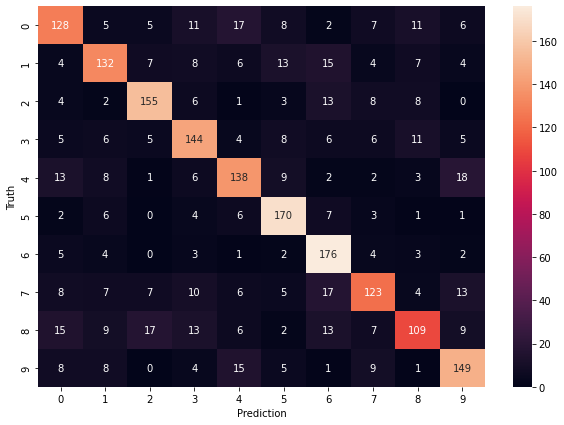

In [53]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')